In [ ]:
#General package imports for the project
import pandas as pd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
import geopandas as gpd
from geopandas import GeoDataFrame
from mpl_toolkits.basemap import Basemap
from sklearn.preprocessing import LabelEncoder
from pathlib import Path
import networkx as nx

# Authentication imports
from google.colab import auth
import gspread
from google.auth import default

auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [ ]:
%cd drive/MyDrive/"SAS345"/"Final_Project"

/content/drive/MyDrive/SAS345/Final_Project


In [ ]:
#open the data file

file_to_open = 'data-main/cldf/languages.csv'
df = pd.read_csv(file_to_open, delimiter=',', skiprows=0, low_memory=False)

df.drop(labels = ["ID","Glottocode"], axis = 1, inplace = True)

In [ ]:
print(df)

                             Name   Latitude  Longitude           Clade
0                        Assamese  26.750900  94.203700         Eastern
1                   Dhivehi: Addu   0.633300  73.166700         Insular
2                 Pashai: Alashai  34.950000  69.760000          Pashai
3                     Alu Kurumba  11.350000  76.800000  S. Dravidian I
4                    Palu Kurumba  11.160000  76.540000  S. Dravidian I
..                            ...        ...        ...             ...
610          Sunha Tharu: Piparia  28.837028  80.320613          Bihari
611  Dangaura Tharu: Shivratanpur  28.528757  80.859858          Bihari
612           Dang Tharu: Kothari  28.040015  82.331800          Bihari
613    Dangaura Tharu: Chandanpur  27.065873  81.897985          Bihari
614       Dangaura Tharu: Rajipur  28.980100  80.199830          Bihari

[615 rows x 4 columns]


In [ ]:
#group dataframe by clade
grouped = df.groupby('Clade')
#test
grouped.get_group("Pashai")

,Name,Latitude,Longitude,Clade
2,Pashai: Alashai,34.9500,69.7600,Pashai
9,Pashai: Areti,34.7500,70.7200,Pashai
62,Pashai: Darrai-i Nur,34.4300,70.3000,Pashai
65,Pashai: Gorayk (Degano),34.6458,70.9008,Pashai
112,Pashai: Gulbahari,35.1700,69.9900,Pashai
137,Pashai: Ishpi,34.8500,69.8700,Pashai
139,Pashai: Iskeni,34.8500,69.8700,Pashai
180,Pashai: Kachur-i Sala,35.1700,69.9900,Pashai
192,Pashai: Kandak,34.6600,70.4300,Pashai
219,Pashai: Kurangali,34.9000,70.9200,Pashai


<ipython-input-8-2f16802e6137>:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


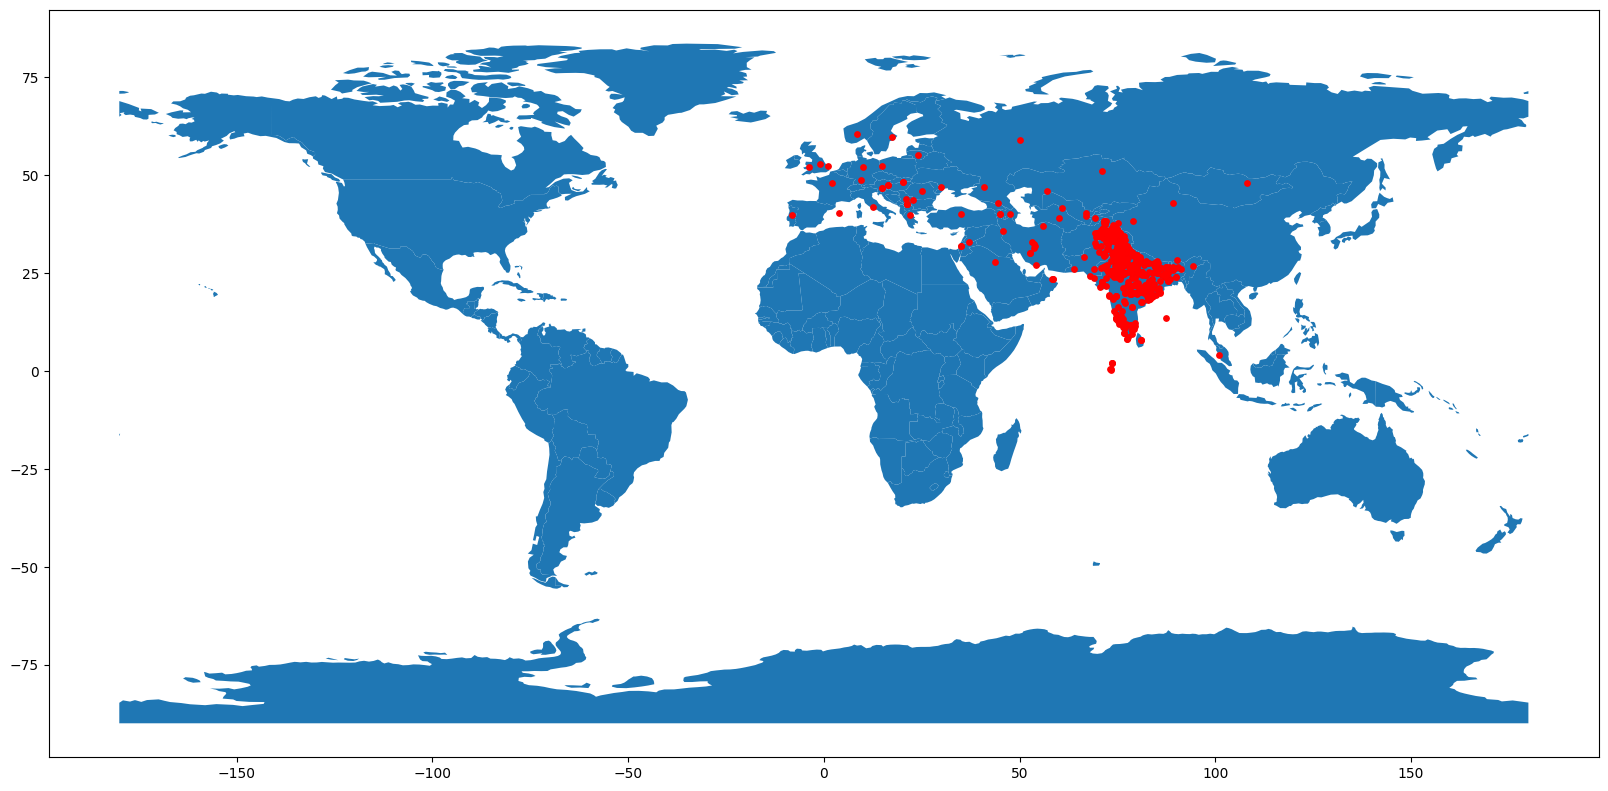

In [ ]:
#plot the data
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf = GeoDataFrame(df, geometry = geometry)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(20, 12)), marker='o', color='red', markersize=15);



<ipython-input-9-8eb28555b499>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(unique_clades))


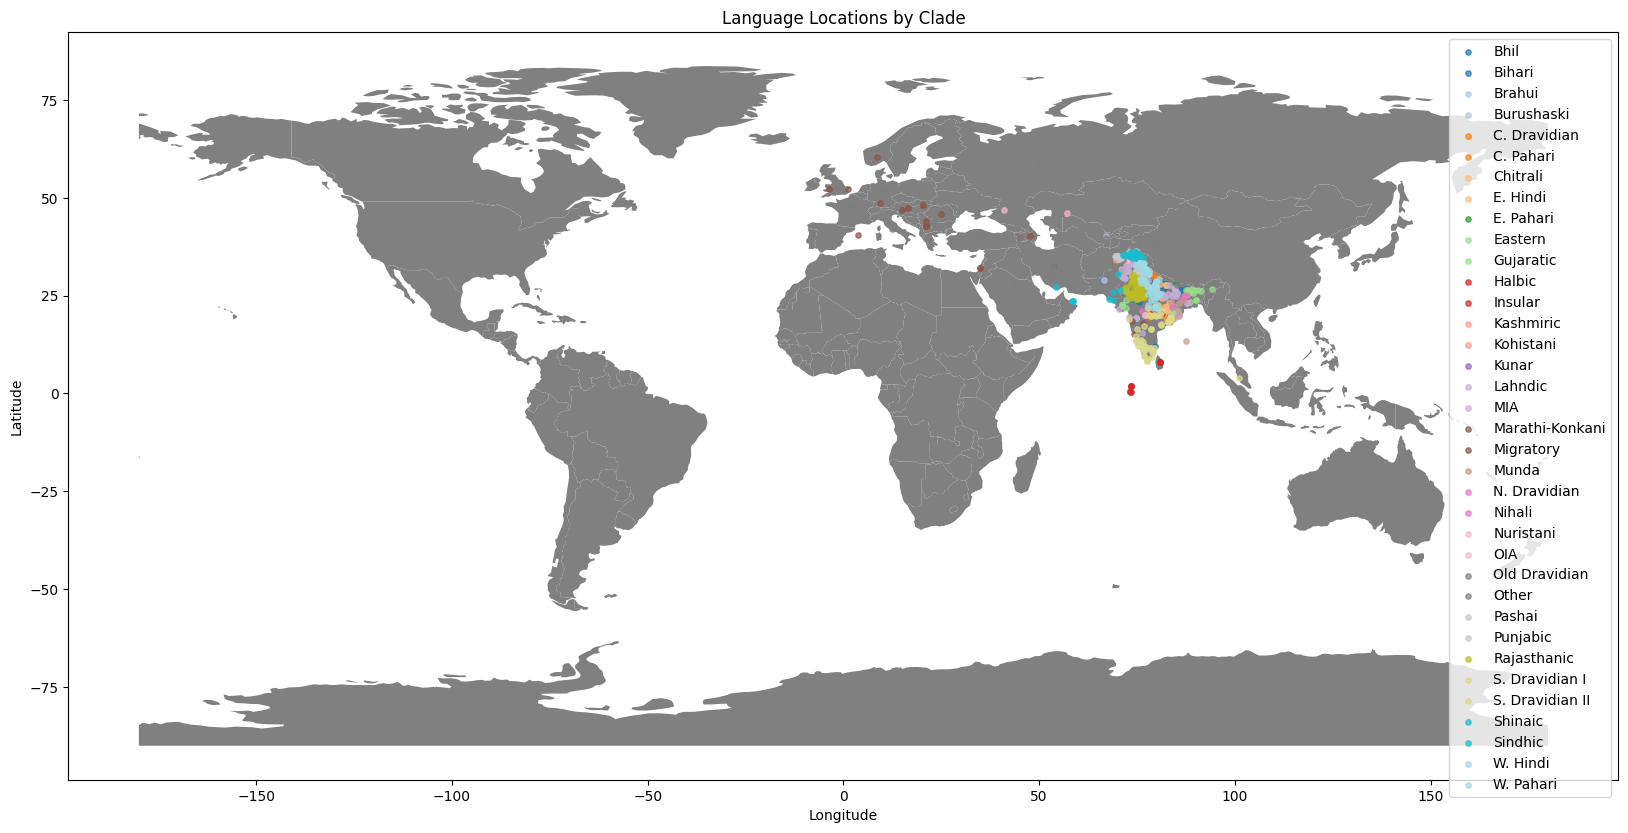

In [ ]:
# Plot the world map first
ax = world.plot(figsize=(20, 12), color='grey')

# Get a list of unique clades and assign a color map to them
unique_clades = df['Clade'].unique()
colors = plt.cm.get_cmap('tab20', len(unique_clades))

# Plot the data for each clade with different colors
for i, (clade, data) in enumerate(grouped):
    geometry = [Point(xy) for xy in zip(data['Longitude'], data['Latitude'])]
    gdf = gpd.GeoDataFrame(data, geometry=geometry)
    gdf.plot(ax=ax, color=colors(i), label=clade, markersize=15, alpha=0.7)

# Set plot attributes
ax.set_title('Language Locations by Clade')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend()

# Show the plot
plt.show()



<ipython-input-10-a8387237a23b>:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
<ipython-input-10-a8387237a23b>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(unique_clades))


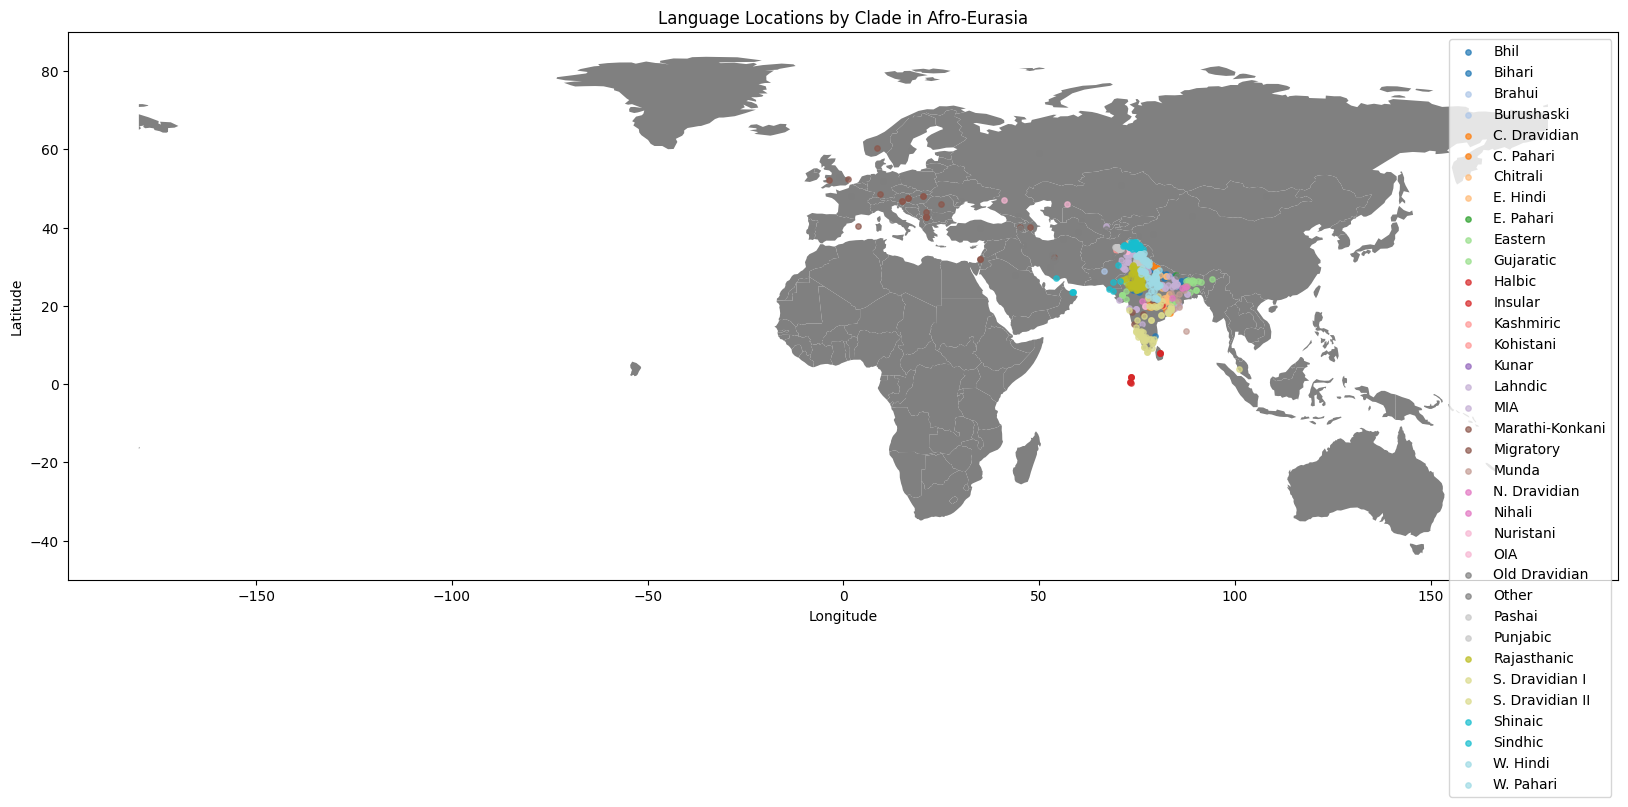

In [ ]:
# Create a GeoDataFrame for the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Define the bounding box for Afro-Eurasia
afro_eurasia = world.cx[-30:180, -30:180]  # Adjust the coordinates as needed

# Plot the Afro-Eurasia map first
ax = afro_eurasia.plot(figsize=(20, 12), color='grey')

# Get a list of unique clades and assign a color map to them
unique_clades = df['Clade'].unique()
colors = plt.cm.get_cmap('tab20', len(unique_clades))

# Plot the data for each clade with different colors
for i, (clade, data) in enumerate(grouped):
    geometry = [Point(xy) for xy in zip(data['Longitude'], data['Latitude'])]
    gdf = gpd.GeoDataFrame(data, geometry=geometry)
    gdf.plot(ax=ax, color=colors(i), label=clade, markersize=15, alpha=0.7)

# Set plot attributes
ax.set_title('Language Locations by Clade in Afro-Eurasia')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend()

# Show the plot
plt.show()


<ipython-input-11-daf058740a5b>:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
<ipython-input-11-daf058740a5b>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(unique_clades))


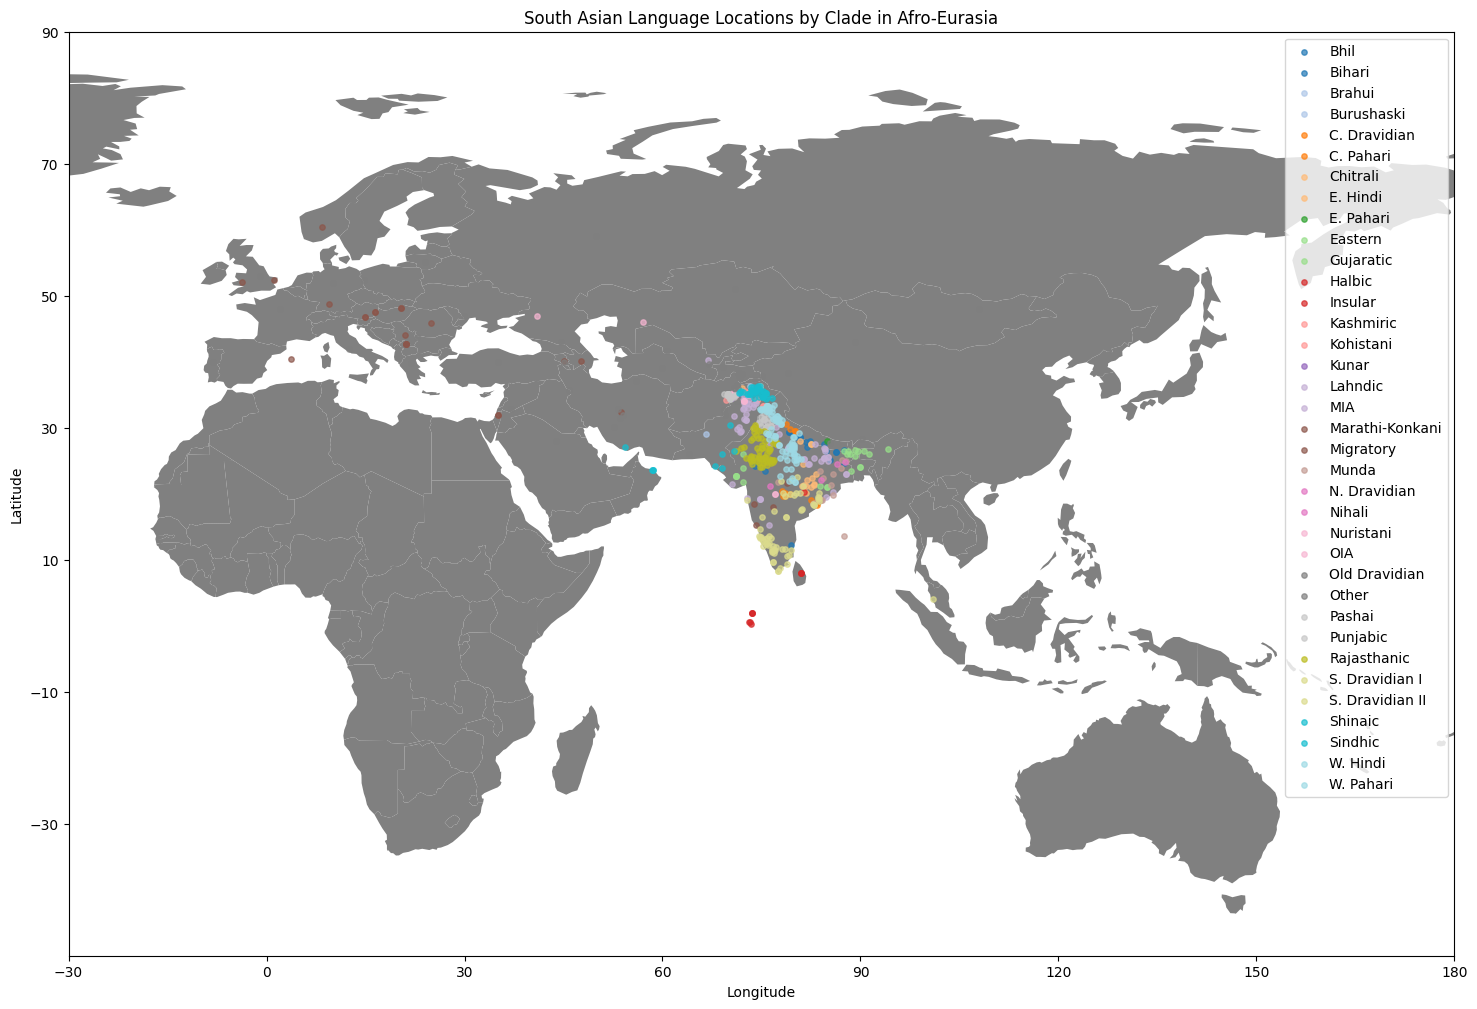

In [ ]:
# Create a GeoDataFrame for the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Define the bounding box for Afro-Eurasia
afro_eurasia = world.cx[-20:180, -30:150]  # Adjust the coordinates for longitude and latitude as needed

# Plot the Afro-Eurasia map first
ax = afro_eurasia.plot(figsize=(20, 12), color='grey')

# Get a list of unique clades and assign a color map to them
unique_clades = df['Clade'].unique()
colors = plt.cm.get_cmap('tab20', len(unique_clades))

# Plot the data for each clade with different colors
for i, (clade, data) in enumerate(grouped):
    geometry = [Point(xy) for xy in zip(data['Longitude'], data['Latitude'])]
    gdf = gpd.GeoDataFrame(data, geometry=geometry)
    gdf.plot(ax=ax, color=colors(i), label=clade, markersize=15, alpha=0.7)

# Set plot attributes
ax.set_title('South Asian Language Locations by Clade in Afro-Eurasia')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend()
# Set x and y ticks
ax.set_xticks(np.arange(-30, 181, 30))  # Adjust the interval for longitude ticks
ax.set_yticks(np.arange(-30, 110, 20))  # Adjust the interval for latitude ticks

# Set x-axis limit for longitude
ax.set_xlim([-30, 180])  # Restricting the display of longitudes from approximately -30 and higher

# Show the plot
plt.show()


<ipython-input-12-0e98fefa916e>:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
<ipython-input-12-0e98fefa916e>:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(unique_clades))


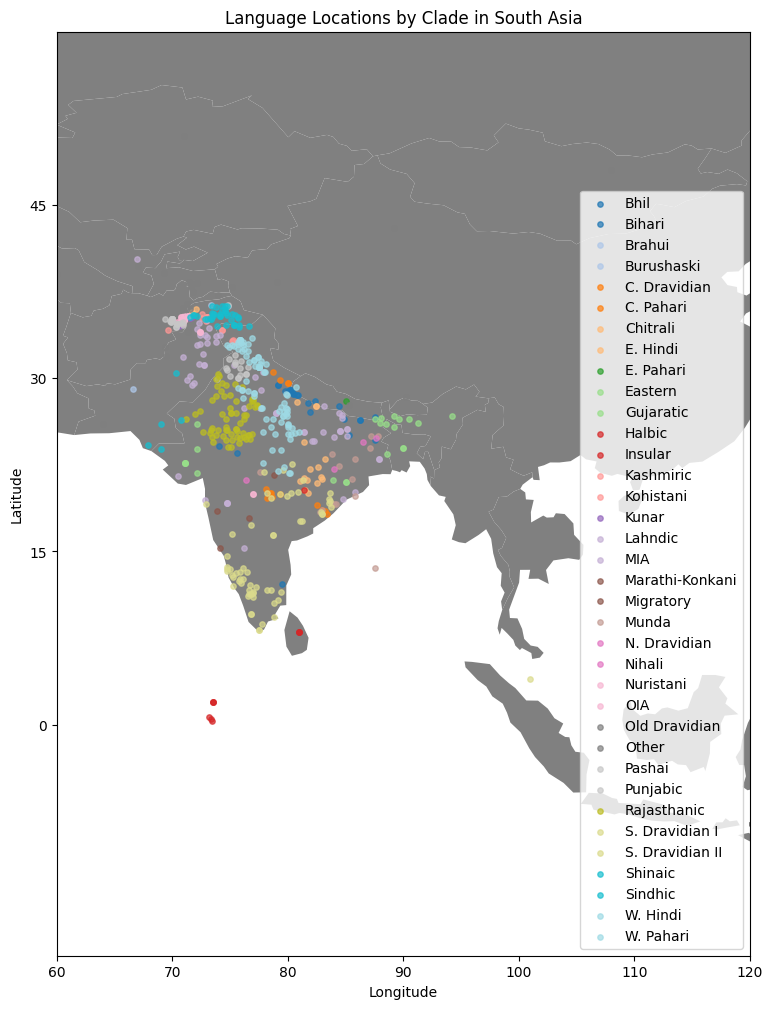

In [ ]:
# Create a GeoDataFrame for the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Define the bounding box for South Asia
south_asia = world.cx[50:100, 0:120]  # Adjust the coordinates for longitude and latitude as needed

# Plot the South Asia map first
fig, ax = plt.subplots(figsize=(20, 12))
south_asia.plot(ax=ax, color='grey')

# Get a list of unique clades and assign a color map to them
unique_clades = df['Clade'].unique()
colors = plt.cm.get_cmap('tab20', len(unique_clades))

# Plot the data for each clade with different colors
for i, (clade, data) in enumerate(grouped):
    geometry = [Point(xy) for xy in zip(data['Longitude'], data['Latitude'])]
    gdf = gpd.GeoDataFrame(data, geometry=geometry)
    gdf.plot(ax=ax, color=colors(i), label=clade, markersize=15, alpha=0.7)

# Set x and y ticks
ax.set_xticks(np.arange(50, 121, 10))  # Adjust the interval for longitude ticks
ax.set_yticks(np.arange(0, 60, 15))  # Adjust the interval for latitude ticks

# Set plot attributes
ax.set_title('Language Locations by Clade in South Asia')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend()

# Set x-axis limit for longitude
ax.set_xlim([60, 120])  # Restricting the display of longitudes from approximately -30 and higher
ax.set_ylim([-20,60])

# Show the plot
plt.show()


In [ ]:
print(grouped.get_group('Insular'))

                    Name  Latitude  Longitude    Clade
1          Dhivehi: Addu    0.6333    73.1667  Insular
78   Dhivehi: Fuvahmulah    0.2984    73.4269  Insular
128     Dhivehi: Huvadhu    0.5000    73.3000  Insular
245              Dhivehi    1.9300    73.5400  Insular
254              Dhivehi    1.9300    73.5400  Insular
293          Old Dhivehi    1.9300    73.5400  Insular
303          Old Sinhala    8.0000    81.0000  Insular
344      Sinhala: Rodiya    8.0000    81.0000  Insular
378              Sinhala    8.0000    81.0000  Insular


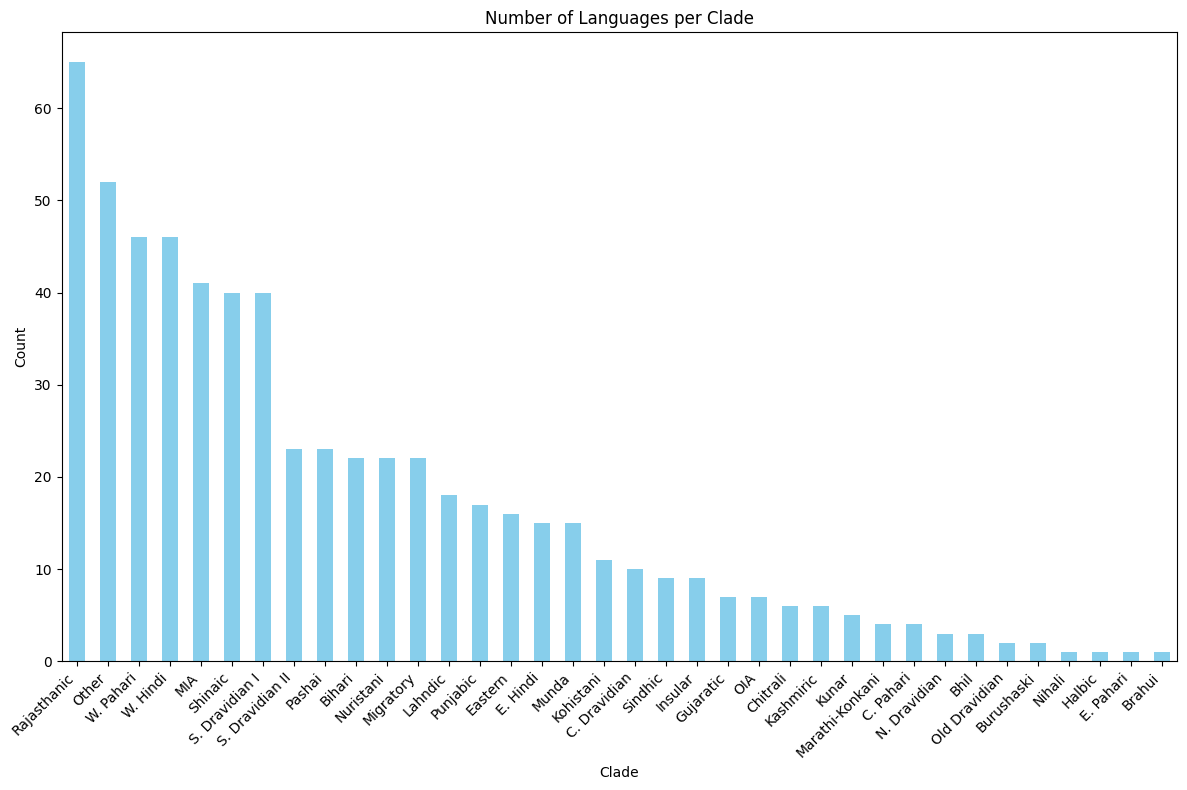

In [ ]:
clade_counts = grouped.size().sort_values(ascending=False)

# Plotting a bar graph
plt.figure(figsize=(12, 8))
clade_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Languages per Clade')
plt.xlabel('Clade')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotating x-axis labels for better readability
plt.tight_layout()
plt.show()


In [ ]:
import plotly.express as px

clade_counts = grouped.size().reset_index(name='Count').sort_values(by='Count', ascending=False)

# Create an interactive bar chart using Plotly Express
fig = px.bar(clade_counts, x='Clade', y='Count', color='Count',
             labels={'Count': 'Number of Languages', 'Clade': 'Language Clade'},
             title='Number of Languages per Clade')
fig.update_layout(xaxis={'categoryorder':'total descending'})  # Sorting x-axis categories by count
fig.show()

#save the interactive plot as an HTML file
fig.write_html('interactive_plot.html')


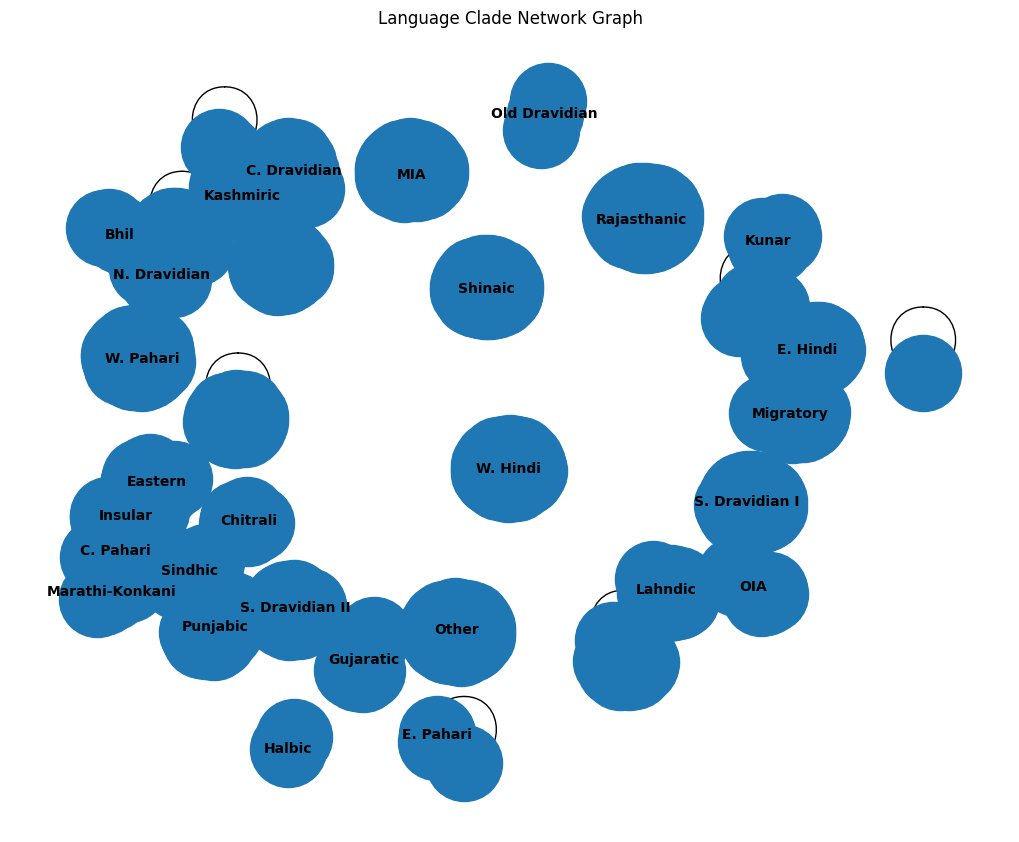

In [ ]:
# Grouping languages by their clades
clades = df.groupby('Clade')['Name'].apply(list).to_dict()

# Create a network graph
G = nx.Graph()

# Add nodes (clades) to the graph
for clade, languages in clades.items():
    G.add_node(clade, node_type='clade')  # Add clade node
    for language in languages:
        G.add_node(language, node_type='language')  # Add language node
        G.add_edge(clade, language)  # Add edge between clade and language

# Visualize the network graph with reduced text
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)

# Display only clade names on the nodes
node_labels = {node: node if G.nodes[node]['node_type'] == 'clade' else '' for node in G.nodes()}
nx.draw(G, pos, with_labels=True, labels=node_labels, node_size=3000, font_size=10, font_weight='bold')
plt.title('Language Clade Network Graph')
plt.show()




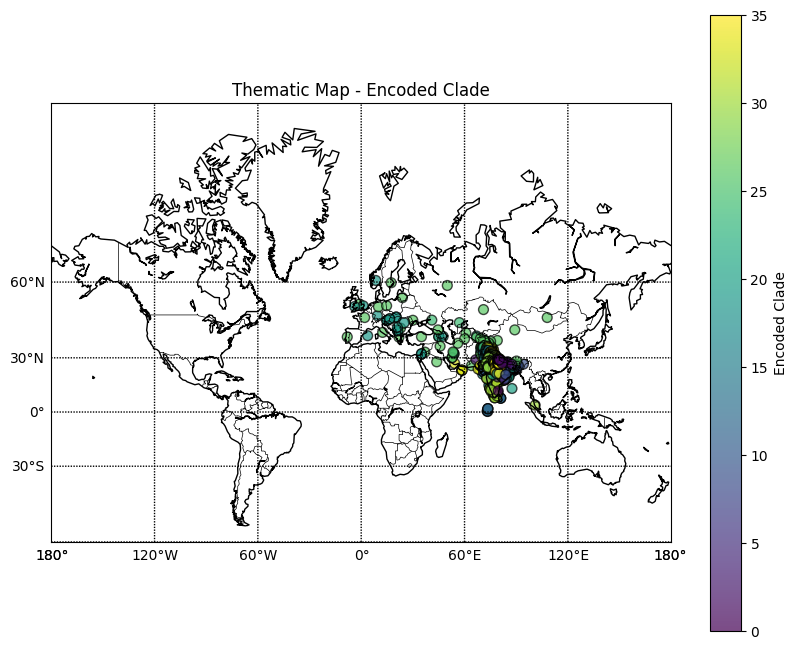

In [ ]:
# Perform label encoding for the 'Clade' column
label_encoder = LabelEncoder()
df['Clade_encoded'] = label_encoder.fit_transform(df['Clade'])

# Create a basic map using Basemap
plt.figure(figsize=(10, 8))
m = Basemap(projection='merc', llcrnrlat=-60, urcrnrlat=85, llcrnrlon=-180, urcrnrlon=180)

# Convert coordinates to map projection
x, y = m(df['Longitude'].values, df['Latitude'].values)

# Scatter plot the linguistic data on the map using the encoded clade values for color
m.scatter(x, y, s=50, c=df['Clade_encoded'], cmap='viridis', alpha=0.7, edgecolors='k')

# Draw coastlines and countries
m.drawcoastlines()
m.drawcountries()

# Add latitude and longitude labels to the map
m.drawparallels(range(-90, 91, 30), labels=[1, 0, 0, 0])  # Latitude labels
m.drawmeridians(range(-180, 181, 60), labels=[0, 0, 0, 1])  # Longitude labels

# Add a colorbar and label
plt.colorbar(label='Encoded Clade')

plt.title('Thematic Map - Encoded Clade')
plt.show()

